In [ ]:
def RunTimeStaller(timeout=False):
  import time
  from google.colab import output
  i=0
  if timeout == False:
    while True:
      #print("The Value is : ",i,end="\r")
      print("Total Time (in Sec) : ",i," >>  Completed : ",round(i/60,3), " Mins")
      time.sleep(1)
      output.clear()
      i+=1
  else :
    timeout = timeout*60*60
    while True:
      #print("The Value is : ",i,end="\r")
      print("Total Time (in Sec) : ",i," >>  Completed : ",round(i/60,3), " Mins")
      if i >= timeout:
        break
      time.sleep(1)
      output.clear()
      i+=1
try:
  RunTimeStaller()
except KeyboardInterrupt:
  print("==== ** ==== !! User Intervention !! ==== ** ====\nEXIT RunTimeStaller")

Total Time (in Sec) :  1438  >>  Completed :  23.967  Mins


# Starting The PreProcessing Process

In [ ]:
%matplotlib inline
%reload_ext autoreload
import os
import pickle
try :
  import SimpleITK as sitk
except ModuleNotFoundError:
  !pip install SimpleITK
  import SimpleITK as sitk
try :
  import pydicom
except ModuleNotFoundError:
  !pip install pydicom
  import pydicom
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  from dipy.viz import regtools
  from dipy.data import fetch_stanford_hardi, read_stanford_hardi
  from dipy.data.fetcher import fetch_syn_data, read_syn_data
  from dipy.align.imaffine import (transform_centers_of_mass,
                                  AffineMap,
                                  MutualInformationMetric,
                                  AffineRegistration)
  from dipy.align.transforms import (TranslationTransform3D,
                                    RigidTransform3D,
                                    AffineTransform3D)
except ModuleNotFoundError:
  !pip install dipy
  from dipy.viz import regtools
  from dipy.data import fetch_stanford_hardi, read_stanford_hardi
  from dipy.data.fetcher import fetch_syn_data, read_syn_data
  from dipy.align.imaffine import (transform_centers_of_mass,
                                  AffineMap,
                                  MutualInformationMetric,
                                  AffineRegistration)
  from dipy.align.transforms import (TranslationTransform3D,
                                    RigidTransform3D,
                                    AffineTransform3D)
try:
  import nibabel as nib
except ModuleNotFoundError:
  !pip install nibabel 
  import nibabel as nib
print("Import DOne")

     |████████████████████████████████| 42.5MB 70kB/s 
     |████████████████████████████████| 35.3MB 89kB/s 
     |████████████████████████████████| 8.1MB 23kB/s 
     |████████████████████████████████| 3.3MB 51.2MB/s 
  Found existing installation: nibabel 2.3.3
    Uninstalling nibabel-2.3.3:
      Successfully uninstalled nibabel-2.3.3
Import DOne


/usr/local/lib/python3.6/dist-packages/dipy/viz/__init__.py:22: UserWarning: You do not have FURY installed. Some visualization functions might not work for you. For installation instructions, please visit: https://fury.gl/
  "You do not have FURY installed. "


In [ ]:
print("Importing Packages...",end=" ")
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
print("Done")

print("Authenticating Google Drive For Use",end='')

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("\nDone")

Importing Packages... Done
Authenticating Google Drive For Use
Done


In [ ]:
#ProstateData.7z: https://drive.google.com/open?id=1D2tfOImHUxAia6k51w30vUgFg791F_iI
#DataMiniProstateX2.7z : https://drive.google.com/open?id=1IY6Vd8hHtqSWEx9oX6yDORIb2lUdRyRM 
#Data For ProstateX2.7z : https://drive.google.com/open?id=1xCyEdhg9h0gWlbzd847lbx4UcLSscTSR

DataFile = 'Data For ProstateX2.7z'
DataID = '1xCyEdhg9h0gWlbzd847lbx4UcLSscTSR'
print("Downloading Dataset",end=' ')
download = drive.CreateFile({'id': DataID})
print("Done\nThe to be Downloaded File is : ",download,"\nGetting Contents...")
download.GetContentFile(DataFile)
print("\nDONE")

The to be Downloaded File is :  GoogleDriveFile({'id': '1xCyEdhg9h0gWlbzd847lbx4UcLSscTSR'}) 
Getting Contents...

DONE


In [ ]:
#DeCompressing the 7zip file
!pip install py7zr
print("Importing Py7zr")
import py7zr
from py7zr import unpack_7zarchive
import shutil
print("Checking Validity of the 7z file : ")
print(py7zr.is_7zfile(DataFile))
print("Trying to Decompress the File...")
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)
print("Decompressing...")
shutil.unpack_archive(DataFile, '/content')
print("DONE ##")

     |████████████████████████████████| 51kB 8.3MB/s 
Importing Py7zr
Checking Validity of the 7z file : 
True
Trying to Decompress the File...
Decompressing...
DONE ##


In [ ]:
#file_list = os.listdir("D:\ProstateXTest")
# file_list
labels_df = pd.read_csv('/content/Data For ProstateX2/Train/Train_Info/ProstateX-2-Findings-Train.csv', index_col=0)
details_df = pd.read_csv('/content/Data For ProstateX2/Train/Train_Info/ProstateX-2-Images-Train.csv', index_col=0)
details_df['patient']=details_df.index
# details_df.sort_values(by = ['patient', 'Name'], ascending = [True, True])
details_df = details_df[(details_df['Name'] == "t2_tse_tra0") | (details_df['Name'] == "t2_tse_tra_Grappa30")]
# labels_df
# details_df
print("Done")
#print(details_df)
#print(labels_df)

Done


In [ ]:
print(labels_df)

                fid  ... ggg
ProxID               ...    
ProstateX-0000    1  ...   3
ProstateX-0001    1  ...   1
ProstateX-0002    1  ...   2
ProstateX-0002    2  ...   1
ProstateX-0004    1  ...   1
...             ...  ...  ..
ProstateX-0200    1  ...   5
ProstateX-0201    1  ...   2
ProstateX-0202    1  ...   4
ProstateX-0203    1  ...   2
ProstateX-0203    2  ...   3

[112 rows x 4 columns]


In [ ]:
labelsDict= {}
regionDict= {}
CoorDicts = {}
voxelSpace = {}
patientcase = {}
data_dir = '/content/Data For ProstateX2/Train/DICOM_Train'
patients = os.listdir(data_dir)
#print(patients[6:])
for patient in patients:
  print("Patient : ",patient)
  label = labels_df.get_value(patient,'ggg')
  region = labels_df.get_value(patient,'zone')
  detail = details_df.get_value(patient,'ijk')
  vspace = details_df.get_value(patient,'VoxelSpacing') #get_value
  #detail = detail.split()
  print("\tLabel : ",label)
  print("\tRegion : ",region)
  print("\tCancer Detail : ",detail)
  print("\tVspace : ",vspace)
  path = data_dir + "/" + patient
  #b = os.walk(path)
  #print("The Path contains Following :",b)
  a = [x[0] for x in os.walk(path)]
  print("\t",a[3])
  #s = os.listdir(a[0])
  #print(s)
  #                   a couple great 1-liners from: https://www.kaggle.com/gzuidhof/data-science-bowl-2017/full-preprocessing-tutorial
  slices = [pydicom.read_file(a[3] + '/' + str(s)) for s in os.listdir(a[3])]
  slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
  print(len(slices),label)
  #print(slices[0].StudyDate)
  #print(slices[0].StudyDate+str(int(float(slices[0].StudyTime))))
  #print(slices[0])
  patientcase[slices[0].StudyDate+str(int(float(slices[0].StudyTime))).rjust(6, '0')]  = patient
  labelsDict[slices[0].StudyDate+str(int(float(slices[0].StudyTime))).rjust(6, '0')] = label
  regionDict[slices[0].StudyDate+str(int(float(slices[0].StudyTime))).rjust(6, '0')] = region
  CoorDicts[slices[0].StudyDate+str(int(float(slices[0].StudyTime))).rjust(6, '0')] = detail
  voxelSpace[slices[0].StudyDate+str(int(float(slices[0].StudyTime))).rjust(6, '0')] = vspace

print("Done")
print("PatientCase : ",patientcase)
print("Labels Dict : ",labelsDict)
print("Region Dict : ",regionDict)
print("Coordi Dict : ",CoorDicts)
print("Voxel Space : ",voxelSpace)

Patient :  ProstateX-0184
	Label :  3
	Region :  PZ
	Cancer Detail :  227 203 14
	Vspace :  0.5,0.5,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0184/05-21-2012-MC prostaat kliniek detectie-mc MCPROSKL30-15016/3-t2tsesag-11422
19 3
Patient :  ProstateX-0069
	Label :  1
	Region :  TZ
	Cancer Detail :  160 195 8
	Vspace :  0.5,0.5,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0069/12-07-2011-MR prostaat kanker detectiemc MCAPRODET-43338/7-ep2ddifftraDYNDISTADC-89538
19 1
Patient :  ProstateX-0150
	Label :  [1 1]
	Region :  ['PZ' 'TZ']
	Cancer Detail :  ['145 173 10' '210 179 11']
	Vspace :  ['0.5,0.5,3' '0.5,0.5,3']
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0150/03-15-2012-MR prostaat kanker detectie WDSmc MCAPRODETW-08825/7-ep2ddifftraDYNDISTADC-74668
19 [1 1]
Patient :  ProstateX-0004
	Label :  1
	Region :  AS
	Cancer Detail :  221 168 7
	Vspace :  0.5,0.5,4.5
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0004/10-18-2011-MR p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


21 1
Patient :  ProstateX-0195
	Label :  4
	Region :  PZ
	Cancer Detail :  169 209 6
	Vspace :  0.5,0.5,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0195/06-04-2012-MC prostaat kliniek detectie-mc MCPROSKL30-15987/4-t2tsetra-87564
19 4
Patient :  ProstateX-0094
	Label :  3
	Region :  TZ
	Cancer Detail :  190 154 9
	Vspace :  0.5,0.5,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0094/12-29-2011-MR prostaat kanker detectie WDSmc MCAPRODETW-46132/3-t2tsesag-07355
19 3
Patient :  ProstateX-0116
	Label :  1
	Region :  PZ
	Cancer Detail :  139 141 10
	Vspace :  0.6,0.6,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0116/01-18-2012-MR prostaat kanker detectiemc MCAPRODET-56041/3-t2tsesag-48748
19 1
Patient :  ProstateX-0187
	Label :  3
	Region :  AS
	Cancer Detail :  199 171 8
	Vspace :  0.5,0.5,3
	 /content/Data For ProstateX2/Train/DICOM_Train/ProstateX-0187/05-25-2012-MR prostaat kanker detectie WDSmc MCAPRODETW-66662/4-t2tsetra-67369
23 3
Patie

In [ ]:
Labels= []
for key in sorted(labelsDict.keys()):
    Labels += [labelsDict[key]]

Case = []
for key in sorted(patientcase.keys()):
    Case += [patientcase[key]]
    
Regions= []
for key in sorted(regionDict.keys()):
    Regions += [regionDict[key]]

Coordinates= []
for key in sorted(CoorDicts.keys()):
    value = CoorDicts[key]
    if type(value) == np.ndarray:
        alist = []
        for i in value:
#             print(np.array([int(j) for j in i.split()]))
            alist += [np.array([int(j) for j in i.split()])]
#         print(alist)
    else:
        alist = [np.array([int(i) for i in value.split()])]
#         print(alist)
    Coordinates += [alist]
    
Space= []
for key in sorted(voxelSpace.keys()):
    value = voxelSpace[key]
#     print(value)
    if type(value) == np.ndarray:
        alist = []
        for i in value:
#             print(np.array([float(j) for j in i.split(",")]))
            alist += [np.array([float(j) for j in i.split(",")])]
        print(alist)
    else:
        alist = [np.array([float(i) for i in value.split(",")])]
        print(alist)
    Space += [alist]

print("Done")

[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ]), array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5625, 0.5625, 3.    ]), array([0.5625, 0.5625, 3.    ])]
[array([0.6, 0.6, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5625, 0.5625, 3.    ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5625, 0.5625, 3.    ])]
[array([0.5625, 0.5625, 3.    ])]
[array([0.5625, 0.5625, 3.    ]), array([0.5625, 0.5625, 3.    ])]
[array([0.5, 0.5, 4.5])]
[array([0.5, 0.5, 3. ]), array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ]), array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.6, 0.6, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5, 3. ])]
[array([0.5, 0.5,

In [ ]:
max([max([j[2] for j in i]) for i in Coordinates])

16

In [ ]:
min([min([j[2] for j in i]) for i in Coordinates])

3

# Sort Patient Folders
Included in PreProcessing.So No Need to Run

In [ ]:
# def last_4chars(x):
#     return(x[:14])

# sortedlist = sorted(file_list, key = last_4chars)[:-7]
# sortedlist
# len(sortedlist)/8

# patientNum =1
# for i in range(0, len(sortedlist), 8):
#     dir_path = "D:\\ProstateXTest\\patient" + str(patientNum) 
#     os.makedirs(dir_path, exist_ok=True)
#     for j in range(0,8):
#         a = sortedlist[i+j]
#         source = "D:\\ProstateXTest\\" + a
#         destination = dir_path +"\\" + a
#         os.rename(source , destination)
#     patientNum += 1

In [ ]:
# data_dir = 'D:\ProstateX\PROSTATEx'
# patients = os.listdir(data_dir)

# for i in patients:
#     root_path = 'D:\\ProstateX\\KtransTrain\\KtransTrain\\'
#     nii_path = root_path + i + '\\'+ i +'-Ktrans.nii'
#     mha_path = root_path + i + '\\'+ i +'-Ktrans.mhd'

#     img = sitk.ReadImage(mha_path)
#     sitk.WriteImage(img, nii_path)

In [ ]:
# case= []
# for key in sorted(patientcase.keys()):
#     case += [patientcase[key]]
# case

# patients = os.listdir("D:\ProstateX")
# def last_4chars(x):
#     return(x[:7])
# num = 0
# patients = sorted(patients, key = last_4chars)[7:]
# for i in patients:
#     source_path = "D:\\ProstateX\\KtransTrain\\KtransTrain\\" + case[num] + '\\'+ case[num] +'-Ktrans.nii'
#     target_path = "D:\\ProstateX\\" + i + '\\'+ i +'-Ktrans.nii'
#     print(source_path)
#     print(target_path)
# #     os.remove(target_path)
#     os.rename(source_path, target_path)
#     num += 1

# Preprocessing

In [ ]:
patients = os.listdir("/content/Data For ProstateX2/Train/DICOM_Train")
print(patients)
def last_4chars(x):
    return(x[10:])

#print(last_4chars('ProstateX-0000'))
patients = sorted(patients,key=last_4chars)
patients


['ProstateX-0184', 'ProstateX-0069', 'ProstateX-0150', 'ProstateX-0004', 'ProstateX-0133', 'ProstateX-0195', 'ProstateX-0094', 'ProstateX-0116', 'ProstateX-0187', 'ProstateX-0203', 'ProstateX-0082', 'ProstateX-0031', 'ProstateX-0005', 'ProstateX-0201', 'ProstateX-0121', 'ProstateX-0173', 'ProstateX-0117', 'ProstateX-0190', 'ProstateX-0054', 'ProstateX-0172', 'ProstateX-0019', 'ProstateX-0103', 'ProstateX-0076', 'ProstateX-0071', 'ProstateX-0040', 'ProstateX-0142', 'ProstateX-0122', 'ProstateX-0152', 'ProstateX-0101', 'ProstateX-0200', 'ProstateX-0018', 'ProstateX-0168', 'ProstateX-0174', 'ProstateX-0129', 'ProstateX-0196', 'ProstateX-0162', 'ProstateX-0105', 'ProstateX-0001', 'ProstateX-0037', 'ProstateX-0192', 'ProstateX-0123', 'ProstateX-0124', 'ProstateX-0114', 'ProstateX-0097', 'ProstateX-0183', 'ProstateX-0136', 'ProstateX-0110', 'ProstateX-0078', 'ProstateX-0102', 'ProstateX-0084', 'ProstateX-0067', 'ProstateX-0014', 'ProstateX-0115', 'ProstateX-0118', 'ProstateX-0125', 'Prostate

['ProstateX-0000',
 'ProstateX-0001',
 'ProstateX-0002',
 'ProstateX-0004',
 'ProstateX-0005',
 'ProstateX-0014',
 'ProstateX-0015',
 'ProstateX-0016',
 'ProstateX-0018',
 'ProstateX-0019',
 'ProstateX-0026',
 'ProstateX-0028',
 'ProstateX-0031',
 'ProstateX-0035',
 'ProstateX-0037',
 'ProstateX-0040',
 'ProstateX-0041',
 'ProstateX-0046',
 'ProstateX-0053',
 'ProstateX-0054',
 'ProstateX-0055',
 'ProstateX-0067',
 'ProstateX-0069',
 'ProstateX-0071',
 'ProstateX-0076',
 'ProstateX-0077',
 'ProstateX-0078',
 'ProstateX-0082',
 'ProstateX-0084',
 'ProstateX-0092',
 'ProstateX-0094',
 'ProstateX-0095',
 'ProstateX-0097',
 'ProstateX-0099',
 'ProstateX-0101',
 'ProstateX-0102',
 'ProstateX-0103',
 'ProstateX-0104',
 'ProstateX-0105',
 'ProstateX-0106',
 'ProstateX-0110',
 'ProstateX-0111',
 'ProstateX-0114',
 'ProstateX-0115',
 'ProstateX-0116',
 'ProstateX-0117',
 'ProstateX-0118',
 'ProstateX-0119',
 'ProstateX-0121',
 'ProstateX-0122',
 'ProstateX-0123',
 'ProstateX-0124',
 'ProstateX-

In [ ]:
def mean(a):
    return sum(a) / len(a)

def smoothslices(inputarray, HM_SLICES):
    slices = inputarray.copy()
    print(len(slices))
#         chunk_sizes = math.ceil(len(slices3) / HM_SLICES)
#         new_slices = []
#         for slice_chunk in chunks(slices3, chunk_sizes):
#             slice_chunk = list(map(mean, zip(*slice_chunk)))
#             new_slices.append(slice_chunk)

    if len(slices) == HM_SLICES-1:
        print(slices.shape)
        print(slices[HM_SLICES-2].shape)
        slices = np.append(slices, 
                           np.reshape(slices[HM_SLICES-2], (1,slices[HM_SLICES-2].shape[0], slices[HM_SLICES-2].shape[1], slices[HM_SLICES-2].shape[2])), 
                           axis=0)
#         print(slices.shape)
        
#     if len(new_slices) == HM_SLICES-2:
#         new_slices.append(new_slices[-1])
#         new_slices.append(new_slices[-1])

    if len(slices) > HM_SLICES:
#         print(slices[HM_SLICES-1:len(slices)].shape)
#         print(np.mean(slices[HM_SLICES-1:len(slices)], axis=0).shape)
#         print(slices[HM_SLICES-1].shape)
        slices[HM_SLICES-1] = np.mean(slices[HM_SLICES-1:len(slices)], axis=0)

    print(slices[:HM_SLICES].shape)
    return slices[:HM_SLICES]

Rough Sheet Cell


In [ ]:
#pip install dicom2nifti
#import dicom2nifti
dicom='/content/DataMiniProstateX2/Test/Ktrans_Test/ProstateX-0204/ProstateX-0204-Ktrans.mhd'
output_folder= '/content/4-t2tsetra-00703'
dicom2nifti.convert_directory(dicom, output_folder,compression=False)

#dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)
#s=os.listdir(output_folder)
#print(s)
#nib.load('/content/ktrans.nii')
#!pip install SimpleITK
#import SimpleITK as sitk

#img = sitk.ReadImage("/content/DataMiniProstateX2/Train/Ktrans_Train/ProstateX-0000/ProstateX-0000-Ktrans.mhd")
#sitk.WriteImage(img,"/content/ktrans.nii")

NameError: ignored

In [ ]:
import os
def ProcessDICOM(folder_path="/content/Data For ProstateX2/Train/",output_path="/content/DataX2Converted",Nifti=True):
    try :
        import pydicom as dicom
        import dicom2nifti
        import SimpleITK as sitk
        import PIL
        import matplotlib.pyplot as plt
        import os
        import cv2
        import pandas as pd
        import csv
        import shutil
    except ModuleNotFoundError:
        !pip install --upgrade dicom2nifti
        !pip install --upgrade SimpleITK
    except Exception as exp:
        print("---- !! IMPORT ERROR [custom_utilities.ProcessDICOM()] !! ----\n",exp,"\n---------- ---------------------------------------- ----------\n")

    print("Main Folder Path is : ",folder_path,"\n")
    
    def DICOMExtractor(folder_path,dir_space=0):
        PNG = False; #nonlocal writer; nonlocal fieldnames;
        if os.path.isdir(folder_path):
            print(' |   '*dir_space,'├──',os.path.basename(folder_path)," >> ") #└──
            next_path = os.listdir(folder_path)
            for i,path in enumerate(next_path):
                next_path[i] = os.path.join(folder_path,path)
            for i,further_path in enumerate(next_path):
                Extractor(further_path,(dir_space+1))
        elif os.path.isfile(folder_path):
            #image_path = os.path.dirname(folder_path)
            try:
                ds = dicom.dcmread(folder_path)
                pixel_array_numpy = ds.pixel_array
                if PNG == False:
                    folder_path = folder_path.replace('.dcm', '.jpg')
                else:
                    folder_path = folder.replace('.dcm', '.png')
                folder_path = folder_path.replace("DataMini","DataMiniExtracted")     #string.replace(old, new, count)
                if os.path.exists(os.path.dirname(folder_path)) == False:
                    os.makedirs(os.path.dirname(folder_path))  #Recursive os.mkdir to create Dirs in MultiLevel which os.mkdir fails to do
                cv2.imwrite(folder_path,pixel_array_numpy)

                #print("Sucessfull Write to  : ",folder_path)
            except dicom.errors.InvalidDicomError:
                original = folder_path
                folder_path = folder_path.replace("DataMini","DataMiniExtracted")
                if os.path.exists(os.path.dirname(folder_path)) == False:
                    os.makedirs(os.path.dirname(folder_path))
                shutil.copyfile(original,folder_path)
                print(' |   '*dir_space,' ** ',os.path.basename(folder_path)," **")
                #pass
            except Exception as exp:
                print(exp)
                #traceback.format_exc()
                #print(sys.exc_info()[1])
                #print(sys.last_value)
                #traceback.print_exception(etype=sys.last_type,value=sys.last_value,tb=sys.last_traceback)

        else:
            print("!! Cannot Determine Path Type !! : ",folder_path)
    
    def DICOM2Nifti(folder_path,dir_space=0):
      if os.path.isdir(folder_path):
        print(' |   '*dir_space,'├──',os.path.basename(folder_path)," >> ") #└──
        next_path = os.listdir(folder_path)
        for i,path in enumerate(next_path):
            next_path[i] = os.path.join(folder_path,path)
        for i,further_path in enumerate(next_path):
            DICOM2Nifti(further_path,(dir_space+1))
      
      elif os.path.isfile(folder_path):
        if '.dcm' in os.path.basename(folder_path):
          try:
            folder_path = os.path.dirname(folder_path)
            output_path = folder_path.replace("Data For ProstateX2","DataX2Converted")     #string.replace(old, new, count)
            if os.path.exists(output_path) == False:
              os.makedirs(output_path)  #Recursive os.mkdir to create Dirs in MultiLevel which os.mkdir fails to do
            dicom2nifti.convert_directory(folder_path,output_path,compression=False)
            #print("Sucessfull Write to  : ",folder_path)
          except dicom.errors.InvalidDicomError:
              original = folder_path
              folder_path = folder_path.replace("Data For ProstateX2","DataX2Converted")
              if os.path.exists(os.path.dirname(folder_path)) == False:
                  os.makedirs(os.path.dirname(folder_path))
              shutil.copyfile(original,folder_path)
              print(' |   '*dir_space,' ** ',os.path.basename(folder_path)," **")
              #pass
          except Exception as exp:
              print("---- !! IMPORT ERROR [custom_utilities.ProcessDICOM.DICOM2Nifti()-Try Block During DICOM to Nifti] !! ----\n",exp,"\n---------- ---------------------------------------- ----------\n")
              #traceback.format_exc()
              #print(sys.exc_info()[1])
              #print(sys.last_value)
              #traceback.print_exception(etype=sys.last_type,value=sys.last_value,tb=sys.last_traceback)
        
        elif '.mhd' in os.path.basename(folder_path):
          try:
            #print(' |   '*dir_space,' ** ',os.path.basename(folder_path)," **")
            img = sitk.ReadImage(folder_path)
            output_path = folder_path.replace("Data For ProstateX2","DataX2Converted")     #string.replace(old, new, count)
            output_path = output_path.replace(".mhd",".nii")
            if os.path.exists(os.path.dirname(output_path)) == False:
              os.makedirs(os.path.dirname(output_path))  #Recursive os.mkdir to create Dirs in MultiLevel which os.mkdir fails to do
            sitk.WriteImage(img,output_path)
          except Exception as exp:
            print("---- !! IMPORT ERROR [custom_utilities.ProcessDICOM.DICOM2Nifti()-Try Block During MHD to Nifti] !! ----\n",exp,"\n---------- ---------------------------------------- ----------\n")
        else:
          original = folder_path
          folder_path = folder_path.replace("Data For ProstateX2","DataX2Converted")
          if os.path.exists(os.path.dirname(folder_path)) == False:
              os.makedirs(os.path.dirname(folder_path))
          shutil.copyfile(original,folder_path)
          print(' |   '*dir_space,' ** ',os.path.basename(folder_path)," ** [Copied to the Output Folder]")
          #pass
      
      else:
        print("!! Cannot Determine Path Type !! : ",folder_path)
      
    if Nifti == True:
      print("\n\t\t==== ** ==== Performing DICOM TO NIFTI ==== ** ====\n")
      DICOM2Nifti(folder_path)
    elif Nifti == False:
      print("\n\t\t==== ** ==== Performing DICOM Extraction ==== ** ====\n")
      DICOMExtractor(folder_path)
    else :
      print("\n\t====  !! Invalid DICOM Processing !!  ====\n")

    print("\n\t\t==== ** ==== Extraction Sucessfully Completed ==== ** ====\n")

ProcessDICOM()

Main Folder Path is :  /content/Data For ProstateX2/Train/ 


		==== ** ==== Performing DICOM TO NIFTI ==== ** ====

 ├──   >> 
 |    ├── DICOM_Train  >> 
 |    |    ├── ProstateX-0184  >> 
 |    |    |    ├── 05-21-2012-MC prostaat kliniek detectie-mc MCPROSKL30-15016  >> 
 |    |    |    |    ├── 4-t2tsetra-53679  >> 
 |    |    |    |    ├── 3-t2tsesag-11422  >> 
 |    |    |    |    ├── 8-ep2ddifftraDYNDISTCALCBVAL-41211  >> 
 |    |    |    |    ├── 7-ep2ddifftraDYNDISTADC-26559  >> 
 |    |    ├── ProstateX-0069  >> 
 |    |    |    ├── 12-07-2011-MR prostaat kanker detectiemc MCAPRODET-43338  >> 
 |    |    |    |    ├── 8-ep2ddifftraDYNDISTCALCBVAL-81896  >> 
 |    |    |    |    ├── 7-ep2ddifftraDYNDISTADC-89538  >> 
 |    |    |    |    ├── 3-t2tsesag-68547  >> 
 |    |    |    |    ├── 4-t2tsetra-62639  >> 
 |    |    ├── ProstateX-0150  >> 
 |    |    |    ├── 03-15-2012-MR prostaat kanker detectie WDSmc MCAPRODETW-08825  >> 
 |    |    |    |    ├── 4-t2tsetra-41386  >> 
 

In [ ]:
stack = []
for i in patients:
    directory = "/content/DataX2Converted/Train/DICOM_Train" + "/" + i
    #print("Patient:",directory)
    dirs = os.listdir(directory)
    midDir = dirs[0]
    #print("Dirs Inside Patient:",midDir)
    dirs = os.listdir(directory+"/"+dirs[0])
    #print("Further Down in Patient : ",dirs)
    dIndex=['tsetra','ADC','BVAL','Ktrans']
    for d in dirs:
      if 'tsetra' in d :
        for furtherDirs in os.listdir(directory+"/"+midDir+"/"+d):
          if '.nii' in os.path.basename(furtherDirs):
            dIndex[0] = midDir + "/" + d + "/" + furtherDirs
      if 'ADC' in d :
        for furtherDirs in os.listdir(directory+"/"+midDir+"/"+d):
          if '.nii' in os.path.basename(furtherDirs):
            dIndex[1] = midDir + "/" + d + "/" + furtherDirs
      if 'BVAL' in d:
        for furtherDirs in os.listdir(directory+"/"+midDir+"/"+d):
          if '.nii' in os.path.basename(furtherDirs):
            dIndex[2] = midDir + "/" + d + "/" + furtherDirs
    for d in os.listdir("/content/DataX2Converted/Train/Ktrans_Train" +"/"+i):
      #print(d)
      if '.nii' in os.path.basename(d):
        dIndex[3] = "/content/DataX2Converted/Train/Ktrans_Train" +"/"+i+"/"+d
    
    #print(dIndex)
    t2 = nib.load(directory + "/" + dIndex[0])
    Diff1 = nib.load(directory + "/" + dIndex[1])
    Diff2 = nib.load(directory + "/" + dIndex[2])
    Ktrans = nib.load(dIndex[3])
    #hdr = t2.header
    #print(hdr)
    static = t2.get_data()
    static_grid2world = t2.affine
    
    moving = Diff1.get_data()
    moving_grid2world = Diff1.affine
    
    moving2 = Diff2.get_data()
    moving2_grid2world = Diff2.affine 
    
    moving3 = Ktrans.get_data()
    moving3_grid2world = Ktrans.affine 
#     print(moving_data.shape)
#     print(moving_affine)
    
    identity = np.eye(4)
    affine_map = AffineMap(identity,
                           static.shape, static_grid2world,
                           moving.shape, moving_grid2world)
    resampled1 = affine_map.transform(moving)
    
    affine_map2 = AffineMap(identity,
                           static.shape, static_grid2world,
                           moving2.shape, moving2_grid2world)
    resampled2 = affine_map2.transform(moving2)
    
    affine_mapk = AffineMap(identity,
                           static.shape, static_grid2world,
                           moving3.shape, moving3_grid2world)
    resampledk = affine_mapk.transform(moving3)
#     regtools.overlay_slices(static, resampled, None, 0,
#                             "Static", "Moving", "D:\\ProstateX\\" + i+ "\\"+"resampled_0.png")
#     regtools.overlay_slices(static, resampled, None, 1,
#                             "Static", "Moving", "D:\\ProstateX\\" + i+ "\\"+"resampled_1.png")
#     regtools.overlay_slices(static, resampled, None, 2,
#                             "Static", "Moving", "D:\\ProstateX\\" + i+ "\\"+"resampled_2.png")

    out= np.stack([static.transpose(2,0,1), resampled1.transpose(2,0,1), resampled2.transpose(2,0,1), resampledk.transpose(2,0,1)], axis=-1)
    #print(out.shape)
    patient = smoothslices(out, 19)
#     resize = []
#     for j in range(19):
# #         resize += [cv2.resize(patient[j],(100,100))]
#         resize += [cv2.resize(patient[j],(300,300))[60:240, 60:240, :]]
# #         resize +=  [cv2.resize(patient[j][75:225, 75:225, :], (100,100))]
# #         print(np.array(resize).shape)
#     stack += [np.array(resize)]
    stack += [patient]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.datao

19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
21
(19, 320, 320, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 320, 320, 4)
21
(19, 320, 320, 4)
21
(19, 384, 384, 4)
21
(19, 384, 384, 4)
21
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
19
(19, 384, 384, 4)
21
(19, 320, 320, 4)
23
(19, 384, 384, 4)
23
(19, 384, 384, 4)
23
(19, 384, 

In [ ]:
Labels[1]

1

In [ ]:
Coordinates[1]

[array([157, 186,  10])]

In [ ]:
# tog = np.array(stack)
# print(len(tog))
print(len(Labels))
print(len(Coordinates))
print(len(Case))
newStack = []
newLabels = []
newCoordinates = []
newCase = []

for i in range(len(stack)):
    print("patient:" + str(i))
    patientseq = stack[i]
    casespace = [j for j in Space[i]] 
    casecorr = [j for j in Coordinates[i]]
    print(casecorr)
    for j in range(len(casecorr)):
        print('finding' +str(j))
        lesion = casecorr[j]
        spacing  = casespace[j]
        increments = int((30/spacing[0])/2)
        print(Case[i])
        print(patientseq.shape)
        print(lesion)
        print(spacing)
        print("increments:" + str(increments))
        crop = patientseq[lesion[2]-2:lesion[2]+3, lesion[0]-increments:lesion[0]+increments,lesion[1]-increments:lesion[1]+increments,:]
        print(crop.shape)
        casestack = []
        for c in crop:
            cstack = []
            for s in range(crop.shape[3]):
#                 print(s)
#                 print(c[:,:,s].shape)
                resize = cv2.resize(c[:,:,s], (60, 60))
                cstack += [resize]
            casestack += [np.stack(cstack, axis=-1)]
        print("reshape:--------------------------------------------")
        print(np.array(casestack).shape)
        newStack += [np.array(casestack)]
        newCase += [Case[i]]
        newCoordinates += [casecorr[j]]
        if (len(casecorr) == 1):
            newLabels += [Labels[i]]
            print(Labels[i])
        else:
            newLabels += [Labels[i][j]]
            print(Labels[i][j])

99
99
99
patient:0
[array([167, 224,   9])]
finding0
ProstateX-0000
(19, 384, 384, 4)
[167 224   9]
[0.5 0.5 3. ]
increments:30
(5, 60, 60, 4)
reshape:--------------------------------------------
(5, 60, 60, 4)
3
patient:1
[array([157, 186,  10])]
finding0
ProstateX-0001
(19, 384, 384, 4)
[157 186  10]
[0.5 0.5 3. ]
increments:30
(5, 60, 60, 4)
reshape:--------------------------------------------
(5, 60, 60, 4)
1
patient:2
[array([154, 217,  12]), array([203, 216,  10])]
finding0
ProstateX-0002
(19, 384, 384, 4)
[154 217  12]
[0.5 0.5 3. ]
increments:30
(5, 60, 60, 4)
reshape:--------------------------------------------
(5, 60, 60, 4)
2
finding1
ProstateX-0002
(19, 384, 384, 4)
[203 216  10]
[0.5 0.5 3. ]
increments:30
(5, 60, 60, 4)
reshape:--------------------------------------------
(5, 60, 60, 4)
1
patient:3
[array([150, 197,   9])]
finding0
ProstateX-0035
(19, 384, 384, 4)
[150 197   9]
[0.5 0.5 3. ]
increments:30
(5, 60, 60, 4)
reshape:--------------------------------------------

In [ ]:
np.array(newStack).shape

(112, 5, 60, 60, 4)

In [ ]:
xlist= []
ylist= []
for i in Coordinates:
    for j in i:
#         print(j[0])
        xlist += [j[0]]
        ylist += [j[1]]
max(xlist)
# max(ylist)

314

# Dumping Data After PreProcessing
Dumping into a Pickle File for Later Use During Training and Testing

In [ ]:
filename1 = 'ProstateX2-PreProcessed-60x4-Channels'
outfile = open(filename1,'wb')
pickle.dump(np.array(newStack) ,outfile)
pickle.dump(newLabels ,outfile)
pickle.dump(newCoordinates ,outfile)
pickle.dump(newCase, outfile)
# pickle.dump(newRegions ,outfile)
outfile.close()

Download From Drive if not Totally Ran PreProcessing


In [ ]:
link = 'https://drive.google.com/open?id=1Ew4Sy8epA6rOY_OWFbheM4sH6BOXGyW6'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Data For ProstateX2-PreProcessed-60x4-Channels')  
# Dataset is now stored in a Pandas Dataframe

In [ ]:
infile = open(filename1,'rb')
newStack = pickle.load(infile)
newLabels = pickle.load(infile)
newCoordinates = pickle.load(infile)
newCase = pickle.load(infile)
infile.close()
# print(Images.shape)
# muchLabels = [i if i.shape == () else i[len(i)-1] for i in Labels]
# muchLabels = [0 if i == 1 else 1 for i in muchLabels]
# catLabels = np_utils.to_categorical(muchLabels)
# print(len(muchLabels))

# Data Exploration After Processing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(19, 384, 384, 4)
[array([167, 224,   9])]
(4, 384, 384)


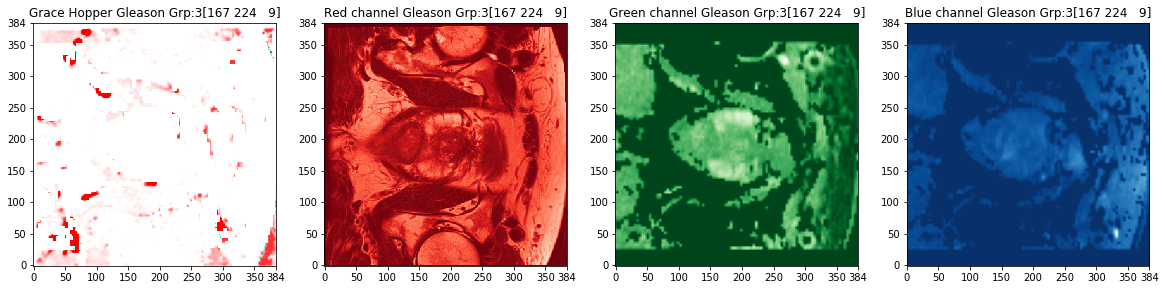

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 384, 384)


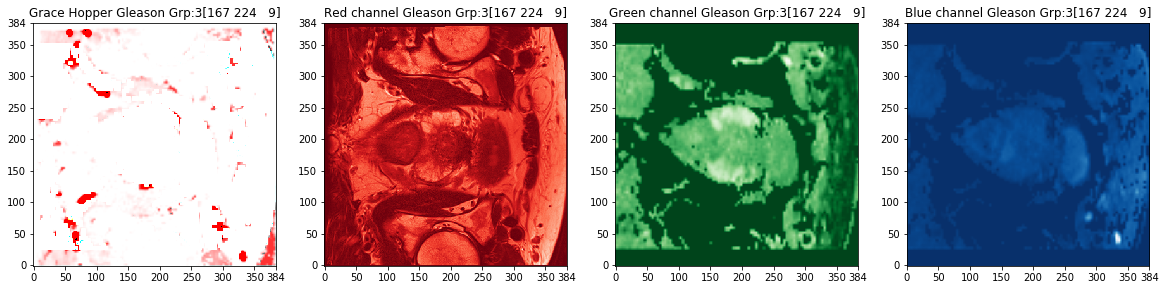

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 384, 384)


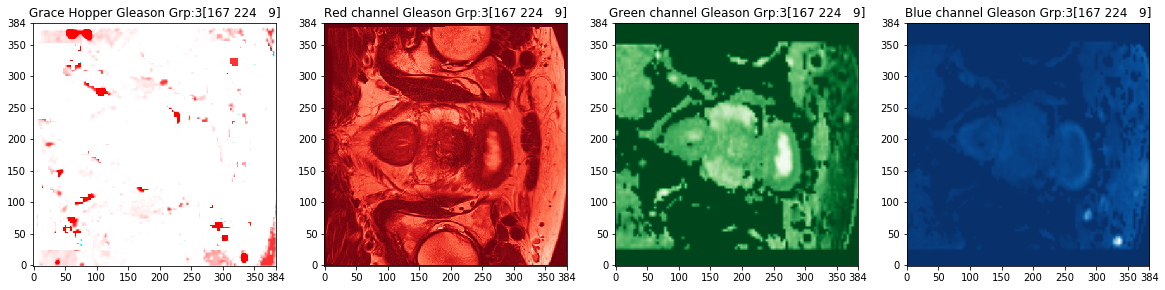

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(19, 384, 384, 4)
[array([157, 186,  10])]
(4, 384, 384)


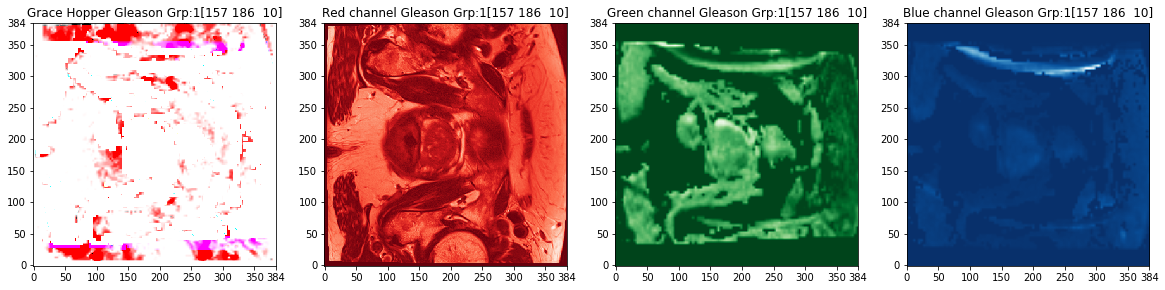

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 384, 384)


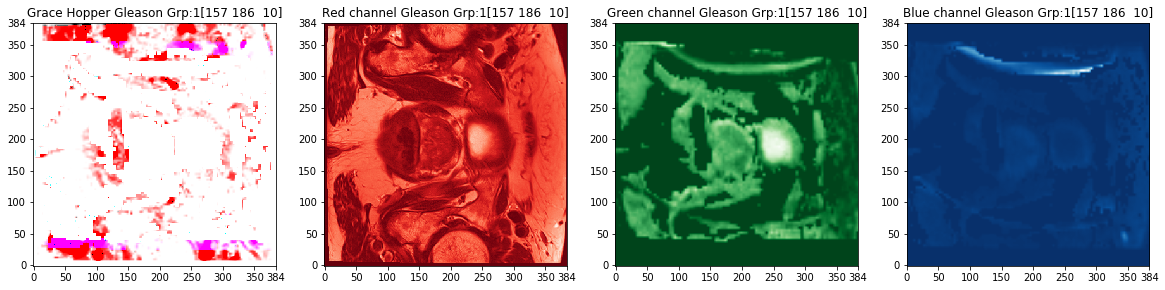

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 384, 384)


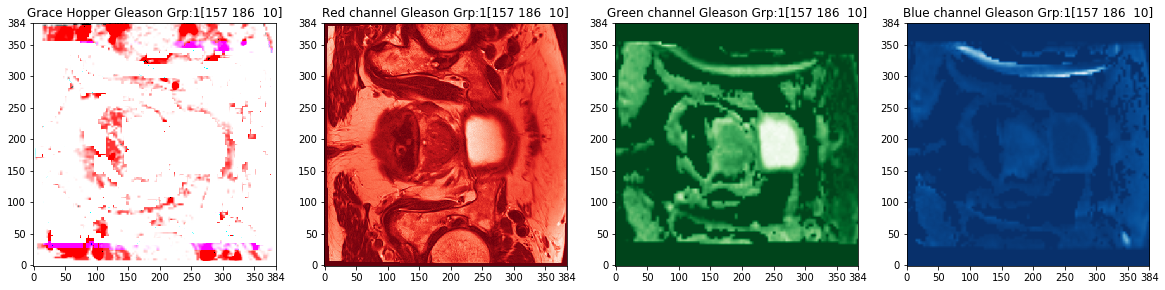

In [ ]:
from matplotlib.patches import Circle
for i in range(0,2):
    patient = stack[i]
    print(patient.shape)
    coor = Coordinates[i]
    label = Labels[i]
    print(coor)
#     print(patient)
    for j in range(patient.shape[0]):
#         print(str(j) + "slice")
        for x in coor:
#             print(j)
            if(j == x[2]) or (j == x[2]-1) or (j == x[2]+1):
#                 print(x[2])
                image = patient[j]
                titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
                cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]
                print(image.transpose(2,0,1).shape)
                
#                 fig, axes = plt.subplots(1, 1, figsize=(3,3))
#                 axes.imshow(image, origin="lower")

                fig, axes = plt.subplots(1, 4, figsize=(20,5))
                objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
                #     print(image.transpose(2,0,1)
                for ax, channel, title, cmap in objs:
                    ax.imshow(channel, cmap=cmap, origin="lower")
                    ax.set_title(title + " Gleason Grp:"+ str(label) + str(x))
#                     if(j == int(x[2])) or (j == x[2]-1) or (j == x[2]+1):
#                         circ = Circle((x[0],x[1]),50, fill=False)
#                         ax.add_patch(circ)
                    ax.set_xticks(([0,50,100,150,200,250,300,350,384]))
                    ax.set_yticks(([0,50,100,150,200,250,300,350,384]))
            plt.show()

(19, 320, 320)

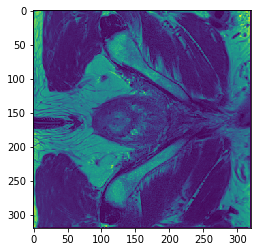

In [ ]:
plt.imshow(resampled1.transpose(2,0,1)[3])
plt.imshow(resampled2.transpose(2,0,1)[3])
plt.imshow(static.transpose(2,0,1)[3])
resampled1.transpose(2,0,1).shape

# Data Exploration After PreProcessing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 60, 60, 4)
0slice
lesion in slice
[167 224   9]
(4, 60, 60)
1slice
lesion in slice
[167 224   9]
(4, 60, 60)
2slice
lesion in slice
[167 224   9]
(4, 60, 60)


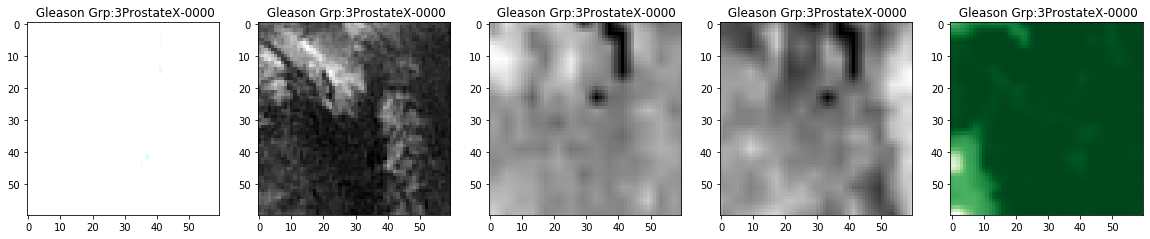

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3slice
lesion in slice
[167 224   9]
(4, 60, 60)
4slice
lesion in slice
[167 224   9]
(4, 60, 60)
(5, 60, 60, 4)
0slice
lesion in slice
[157 186  10]
(4, 60, 60)
1slice
lesion in slice
[157 186  10]
(4, 60, 60)
2slice
lesion in slice
[157 186  10]
(4, 60, 60)


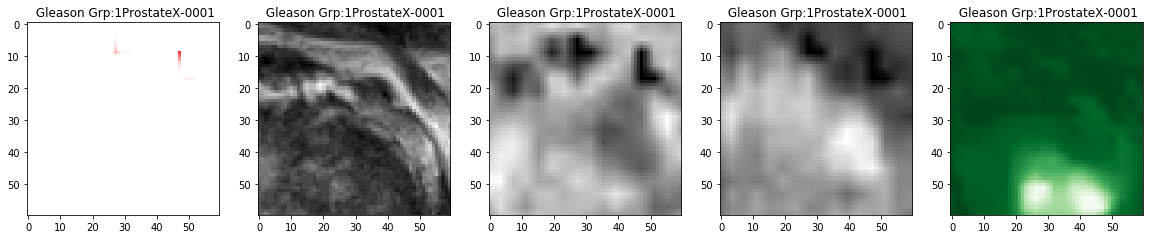

3slice
lesion in slice
[157 186  10]
(4, 60, 60)
4slice
lesion in slice
[157 186  10]
(4, 60, 60)


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Circle
for i in range(0,2):
    patient = newStack[i]
    print(patient.shape)
    case = newCase[i]
    coor = newCoordinates[i]
    label = newLabels[i]
#     region = Regions[i]
    
#     print(patient)
    for j in range(patient.shape[0]):
        print(str(j) + "slice")
        print("lesion in slice")
        print(coor)
        image = patient[j]
        titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
        cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.Greens_r]
        print(image.transpose(2,0,1).shape)

#         fig, axes = plt.subplots(1, 1, figsize=(3,3))
#         axes.imshow(image, origin="lower")
        if  j == 2:
            fig, axes = plt.subplots(1, 5, figsize=(20,5))
            objs = zip(axes, (image, *image.transpose(2,0,1)), cmaps)
    #         #     print(image.transpose(2,0,1)
            for ax, channel, cmap in objs:
                ax.imshow(channel, cmap=cmap, origin="upper")
                ax.set_title(" Gleason Grp:"+ str(label) +str(case))
    #             circ = Circle((coor[1],coor[0]),50, fill=False, color='blue')
    #             ax.add_patch(circ)
    #             ax.set_xticks(([0,50,100]))
    #             ax.set_yticks(([0,50,100]))
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(19, 384, 384, 4)
[array([167, 224,   9])]
0slice
1slice
2slice
3slice
4slice
5slice
6slice
7slice
8slice
9slice
lesion in slice
(4, 384, 384)


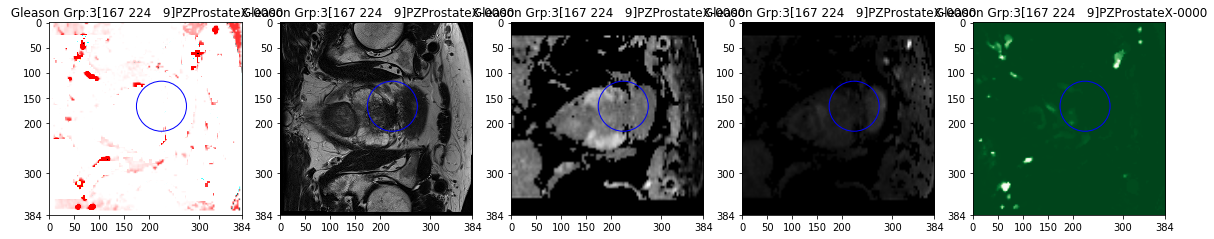

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10slice
11slice
12slice
13slice
14slice
15slice
16slice
17slice
18slice
(19, 384, 384, 4)
[array([157, 186,  10])]
0slice
1slice
2slice
3slice
4slice
5slice
6slice
7slice
8slice
9slice
10slice
lesion in slice
(4, 384, 384)


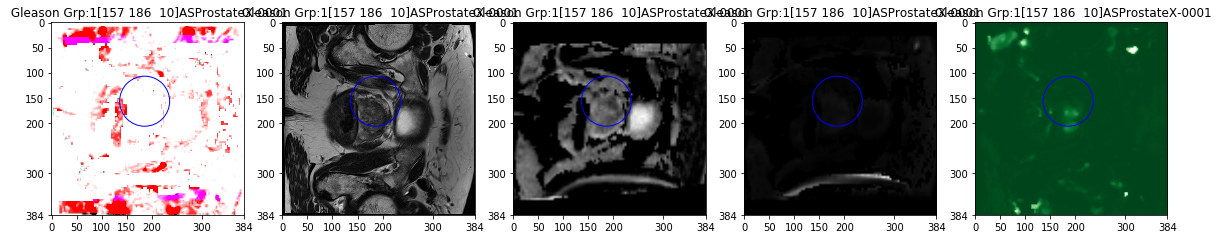

11slice
12slice
13slice
14slice
15slice
16slice
17slice
18slice


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.patches import Circle
for i in range(0,2):
    patient = stack[i]
    print(patient.shape)
    case = Case[i]
    coor = Coordinates[i]
    label = Labels[i]
    region = Regions[i]
    print(coor)
#     print(patient)
    for j in range(patient.shape[0]):
        print(str(j) + "slice")
        for x in coor:
#             print("s")
            if(j == x[2]):
                print("lesion in slice")
                image = patient[j]
                titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
                cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.gray, plt.cm.Greens_r]
                print(image.transpose(2,0,1).shape)
                
#                 fig, axes = plt.subplots(1, 1, figsize=(3,3))
#                 axes.imshow(image, origin="lower")

                fig, axes = plt.subplots(1, 5, figsize=(20,5))
                objs = zip(axes, (image, *image.transpose(2,0,1)), cmaps)
                #     print(image.transpose(2,0,1)
                for ax, channel, cmap in objs:
                    ax.imshow(channel, cmap=cmap, origin="upper")
                    ax.set_title(" Gleason Grp:"+ str(label) + str(x) + str(region) +str(case))
                    if(j == int(x[2])) or (j == x[2]-1) or (j == x[2]+1):
                        circ = Circle((x[1],x[0]),50, fill=False, color='blue')
                        ax.add_patch(circ)
                    ax.set_xticks(([0,50,100, 150, 200, 300, 384]))
                    ax.set_yticks(([0,50,100, 150, 200, 300, 384]))
            plt.show()

In [ ]:
stack[0][8][:,:, 1:2].shape

(384, 384, 1)

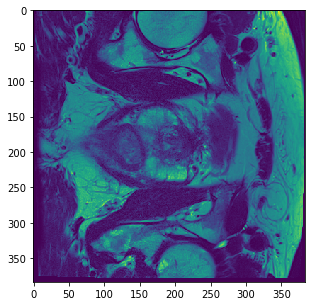

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.imshow(stack[0][8][:,:, 0])